# Anomalie-, Fehler- und Ausreißererkennung

## Einleitung

Die Anomalie-, Fehler- und Ausreißererkennung bezieht sich auf Methoden, die darauf abzielen, ungewöhnliche oder unerwartete Muster in Daten zu erkennen. Diese Techniken sind besonders nützlich in Bereichen wie Betrugserkennung, Qualitätssicherung, Netzwerküberwachung oder der Erkennung von maschinellen Fehlern. 

## Anomalien, Fehler und Ausreißer

### Anomalien

Anomalien sind Datenpunkte, die sich stark von der Mehrheit der Daten unterscheiden. Sie weisen auf seltene, oft unerwartete Ereignisse hin, z.B. Fehler in Systemen oder ungewöhnliche Transaktionen (wie Kreditkartenbetrug).

### Fehler

Fehler sind in der Regel explizite Fehlfunktionen oder unerwartete Zustände in Systemen (z.B. Maschinenausfälle).


### Ausreißer
Ausreißer sind extreme Datenpunkte, die im Vergleich zum Rest der Daten besonders groß oder klein sind. Nicht alle Ausreißer sind Anomalien, aber sie können auf solche hindeuten.

## KI-Methoden zur Anomalieerkennung

### Autoencoders

Diese sind neuronale Netze, die darauf trainiert werden, die Eingabedaten zu komprimieren und wieder zu rekonstruieren. Wenn eine Eingabe nicht gut rekonstruiert wird (weil sie z.B. eine Anomalie ist), weist das Netz darauf hin.

### Deep Learning

Hierbei werden die Daten manuell mit Labels versehen (z.B. normale Daten vs. Anomalien). Anomalien werden, durch Training eines Klassifikationsalgorithmuses erkannt.

### Zeitreihenmodelle mit KI

Bei zeitlich geordneten Daten, werden spezielle LSTMs (Long Short-Term Memory Networks) genutzt, welche auf zeitliche Abhängigkeiten in den Daten achten. Solche Modelle lernen das „normale“ Verhalten über die Zeit und erkennen Anomalien, sofern diese auftreten sollten.

### Clustering-basierte KI-Modelle 

Diese Methoden sind nützlich, wenn keine Labels vorhanden sind und die Datenclusterierung zur Erkennung von Ausreißern genutzt werden soll. KI-Algorithmen wie K-Means oder DBSCAN gruppieren ähnliche Datenpunkte. Punkte, die keiner Gruppe zugeordnet werden oder weit von den Gruppen entfernt liegen, können als Anomalien betrachtet werden.

## Wie funktioniert die Anomalieerkennung?

Die Anomalieerkennung sucht nach Mustern oder Datenpunkten, die nicht in das normale Verhalten passen. Anomalieerkennung mit KI nutzt Algorithmen, die Muster in den Daten lernen, um Unterschiede oder unerwartete Abweichungen zu erkennen. Im Gegensatz zu einfachen statistischen Methoden kann KI diese Muster in hochdimensionalen und komplexen Datensätzen effizient erfassen.


## Anwendungsbeispiele

### Betrugserkennung 

Um verdächtige Transaktionen zu erkennen, setzen Banken KI-Modelle ein. Jene analysieren große Mengen von Finanztransaktionen und markieren solche, die von der Norm abweichen (z.B. plötzliche große Ausgaben an ungewöhnlichen Orten).

### Industrie 4.0

In der Fertigung überwachen KI-gestützte Systeme Sensordaten von Maschinen, um Fehler oder Ausfälle vorherzusagen, bevor sie auftreten. Anomalien in Temperatur, Druck oder Schwingungen weisen auf potenzielle Probleme hin.

### Gesundheitswesen

KI-Systeme überwachen Vitaldaten von Patienten, um Anomalien (z.B. ungewöhnliche Herzfrequenz oder Atemmuster) zu erkennen, die auf gesundheitliche Komplikationen hinweisen.

In [39]:
!pip install pandas prophet scikit-learn scipy numpy

  Using cached holidays-0.58-py3-none-any.whl (1.1 MB)
  Attempting uninstall: holidays
    Found existing installation: holidays 0.24
    Uninstalling holidays-0.24:
      Successfully uninstalled holidays-0.24


In [41]:
try:
    import sklearn
    print("Scikit-learn importiert")
except Exception as e:
    print(f"Fehler beim Import von Scikit-learn: {e}")

Fehler beim Import von Scikit-learn: 


In [43]:
!pip show scikit-learn scipy numpy pandas prophet

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote produ

In [44]:
pip install numpy==1.24.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 26.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
Note: you may need to restart the kernel to use updated packages.


14:28:45 - cmdstanpy - INFO - Chain [1] start processing


1.8


14:28:45 - cmdstanpy - INFO - Chain [1] done processing


IndexError: Replacement index 1 out of range for positional args tuple

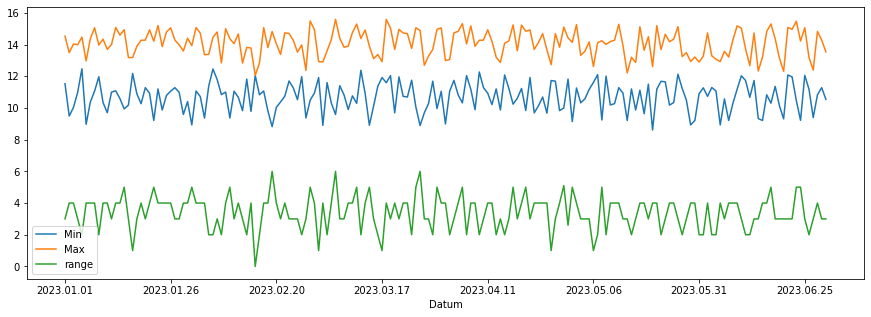

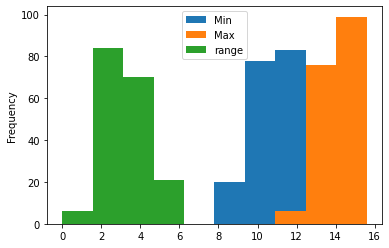

In [14]:
import pandas as pd
# Prophet by Facebook
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
from IPython.display import HTML

actual = [2, 3, 5, 5,9]
predicted = [3, 3, 8, 7, 6]
mae = mean_absolute_error(actual,predicted)
print(mae)

df = pd.read_csv('BspAusreißerErkennungDaten.csv') #Zeitreihendaten: Spalten (Datum, Min, Max)
pd.set_option('display.max_columns', None)
df.plot(x='Datum', figsize=(15,5))
df.plot.hist()

#preparing the Train & Predict function
def prediction_Prophet(feature):
    dfNew = pd.DataFrame()
    dfNew['ds'] = pd.to_datetime(df['Datum'], dayfirst = True)
    dfNew['y'] = df[[feature]].copy()
    
    m = Prophet(daily_seasonality = True)
    m.fit(dfNew)
    horizon = 1
    future = m.make_future_dataframe(periods = horizon)
    forecast = m.predict(future)
    print('\nForcasted {} values \n {}\n'.format(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()))
    fig1 = m.plot(forecast)
    fig2 = m.plot_components(forecast)
    return forecast

pred = prediction_Prophet('range')

df['Range_by_Prophet'] = pred['yhat_upper']

print('Anomalies for range values\n', df[df['range']>df['Range_By_Prophet']][['Datum', 'Tag', 'Range', 'Range_By_Prophet']])

## Fazit

KI-basierte Anomalieerkennung nutzt Maschine Learning, um automatisch und effizient Muster in komplexen Datensätzen zu erkennen und von diesen abweichende Datenpunkte als Anomalien zu identifizieren. Sie ist besonders effektiv bei der Erkennung von seltenen, schwer vorhersagbaren Ereignissen in Daten, die zu groß oder komplex für traditionelle Ansätze sind.

[1] https://towardsdatascience.com/anomaly-detection-using-autoencoders-5b032178a1ea <br>
[2] https://deepai.org/machine-learning-glossary-and-terms/anomaly-detection <br>
[3] https://www.kaggle.com/code/kmkarakaya/anomaly-detection-in-time-series